# 🏦 대출 승인 여부 예측 실습 - 파트별 구성

## 📌 PART 1. 환경 설정 및 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 데이터 불러오기
df = pd.read_csv("loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 📌 PART 2. 전처리

In [5]:
# 결측값 처리
df = df.fillna(method='ffill')

# 범주형 변수 인코딩
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# X, y 분리
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

/var/folders/r7/dy1kfvr908nc6b5wz0kk9_g40000gn/T/ipykernel_10109/3816314399.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


## 📌 PART 3. 평가 함수 정의

In [9]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n\n🔍 [{name}] 결과")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

    # ROC Curve 시각화
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

## 📌 PART 4. 모델 학습 및 평가



🔍 [Decision Tree] 결과
Confusion Matrix:
[[22 16]
 [21 64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54        38
           1       0.80      0.75      0.78        85

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.70      0.70       123

Accuracy: 0.6992
ROC AUC: 0.6659


🔍 [Random Forest] 결과
Confusion Matrix:
[[22 16]
 [ 4 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123

Accuracy: 0.8374
ROC AUC: 0.8167


🔍 [XGBoost] 결과
Confusion Matrix:
[[25 13]
 [ 9 76]]

Classification Report:
              precision    recall 

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:38:08] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


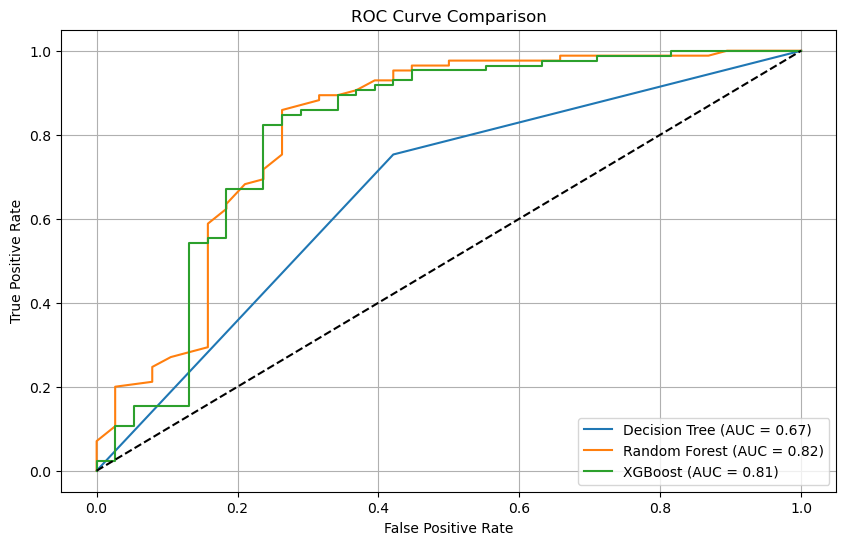

In [12]:
# 모델 정의
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# ROC 비교 시각화
plt.figure(figsize=(10, 6))
evaluate_model(dt, "Decision Tree")
evaluate_model(rf, "Random Forest")
evaluate_model(xgb, "XGBoost")

# 마무리
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()